In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt    
from sklearn import metrics 
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
import re

In [ ]:
###Functions###
#====================================================  
def evo_met(y_test , y_pred,name):   
    evo = metrics.confusion_matrix(y_test , y_pred)
    df_confusion = pd.DataFrame(evo , index=['Actual Negative','Actual Positive'],columns=['Predicted Negative','Predicted Positive'])
    print("confusion matrix of",name,"is:\n")
    display(df_confusion)

#====================================================   

def calc_evaluation_val(eval_metric, y_test, y_predicted):
    if (eval_metric == 'accuracy'):
        evaluation_val = metrics.accuracy_score(y_test,y_predicted)
        
    elif (eval_metric == 'precision'):
        evaluation_val = metrics.precision_score(y_test,y_predicted)
        
    elif (eval_metric == 'recall'):
        evaluation_val = metrics.recall_score(y_test,y_predicted)
        
    elif (eval_metric == 'f1'):
        evaluation_val = metrics.f1_score(y_test,y_predicted)
        
    else:
        evaluation_val = metrics.confusion_matrix(y_test,y_predicted)
        
    return evaluation_val  

#====================================================  
def add_left_early_col(df):
    left_early = []
    for seniority in df['workplace_seniority']:
      if seniority == 0:
        left_early.append(1)
      else:
        left_early.append(0)
      
    df['left_early'] = left_early
    
    return df
#====================================================  
def split_to_X_y(df, target_column):
    TRAINING_FEATURES = df.columns[df.columns != target_column]
    TARGET_FEATURE = target_column
    
    X=df[TRAINING_FEATURES]
    y=df[TARGET_FEATURE]
    
    return X,y
#====================================================  
def split_to_train_and_test(X, y, test_ratio, rand_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)
    
    return X_train, X_test, y_train,y_test
#====================================================  
def manipulate_feature_vector(X):
    #Encode
    le1 = LabelEncoder()
    X['company_name'] = le1.fit_transform(X["company_name"])
    EncodedCompanies = dict(zip(le1.classes_, le1.transform(le1.classes_)))

    le2 = LabelEncoder()
    X['review_essence'] = le2.fit_transform(X["review_essence"])
    EncodedReview = dict(zip(le2.classes_, le2.transform(le2.classes_)))

    le3 = LabelEncoder()
    X['advantages'] = le3.fit_transform(X["advantages"])
    EncodedReview = dict(zip(le3.classes_, le3.transform(le3.classes_)))

    le4 = LabelEncoder()
    X['disadvantages'] = le4.fit_transform(X["disadvantages"])
    EncodedReview = dict(zip(le4.classes_, le4.transform(le4.classes_)))

    #Drop
    X.drop('year_of_resignation',axis=1, inplace=True)
    X.drop('workplace_seniority',axis=1, inplace=True)



    return X
#====================================================  
def find_best_k_for_KNN(X_train, y_train):
    parameters = {'n_neighbors':[1,3,5,7,9,11] }
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    
    best_K, best_f1_val = clf.best_params_, clf.best_score_
    
    return best_K['n_neighbors'], best_f1_val

#====================================================  
def find_best_decision_tree_params(X_train, y_train):
    parameters = {'max_depth':[2,4,6,8,10],"min_samples_split":[5,10,20,30] }
    dt = DecisionTreeClassifier()

    clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    
    best_max_depth = clf.best_params_['max_depth']
    best_min_samples_split = clf.best_params_['min_samples_split']
    best_f1_val = clf.best_score_
    
    return best_max_depth, best_min_samples_split, best_f1_val
#====================================================  
def find_best_random_forest_num_estimators(X_train, y_train):
    parameters = {'n_estimators': [11,61,71] }
    dt = RandomForestClassifier()

    clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    
    best_num_estimators = clf.best_params_['n_estimators']
    best_f1_val = clf.best_score_
    
    return best_num_estimators, best_f1_val
 #====================================================   
def plotplot(machine,train,test,name,color1,color2):
  
  font = {'size': 25}
  plt.rc('font', **font)

  x = np.arange(len(machine))  # the label locations
  width = 0.2  # the width of the bars

  fig, ax = plt.subplots(figsize=(30,15))
  rects1 = ax.bar(x - width/2, train, width, label='Train',color=color1)
  rects2 = ax.bar(x + width/2, test, width, label='Test',color=color2)

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Scores',fontsize=50)
  ax.set_title(name,fontsize=50)
  ax.set_xticks(x)
  ax.set_xticklabels(machine,fontsize=30)
  ax.legend(fontsize=30,loc="lower left")

  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')


  autolabel(rects1)
  autolabel(rects2)

  fig.tight_layout()
  plt.show()

  #====================================================  


In [ ]:
df = pd.read_csv('/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/Data/whole_economy_data.csv', index_col=0) 

df

,company_name,year_of_employment,year_of_resignation,ranking,review_essence,disadvantages,advantages,workplace_seniority
0,סופר פארם,2019,2019,2.0,"ניצול העובד עד המקסימום, תמורה לא בהתאם","שכר נמוך , הנהלה של החברה לא תומך ולא חושב על ...","הנחה בעת קנייה של מוצרים, ימי כיף ,משמרות נוחות ,",0
1,ללין,2016,2016,3.0,חברה גדולה טובה ומוצלחת .,שעות עבודה מעטות. שעות העבודה בשבת הן הין 6-8 ...,האווירה נעימה ומדהימה. שירות הלקוחות מעולה. כי...,0
2,טסקום,2016,2016,3.1,חברה טובה ואיכותית לעבודה,לא מצאתי שום חסרונות,ניהול טוב יחס טוב,0
3,תן ביס,2019,2019,3.0,ממש נהנה מכל רגע בו אני מגיע לעבודה,אין לי דבר אחד רע להגיד עליהם!,אהבתי את האווירה וזה חיזק אותי נפשית,0
4,ארנסט אנד יאנג,2016,2016,3.2,ממליץ בחום לרזומה מצויין,"אין הרבה חסרונות , אך אין גיבוש חברתי",נעים לסביבת עבודה איכותית,0
...,...,...,...,...,...,...,...,...
55979,פריקור,1990,2021,4.4,"ידע, טכנולוגיה, רגולציה והכרות עם שלל לקוחות",עבודה בשעות חריגות ולעיתים תחת לחץ זמנים,"עסק שהוא משפחה, מקום אידיאלי לעבודה עם צוות מק...",31
55980,משרד החינוך,1989,2020,4.1,תחושה של שליחות לאורך כל הדרך,אין הרבה לאן להתקדםהשתלמויות נתונות לחא חופש ב...,חופשיםשעות נוחותשנת שבתוןעניין רבהשתלמויות כמע...,31
55981,חברת החשמל,1989,2020,4.3,חברה שמתחדשת כל הזמן.,עדיין יש תפיסה של פעם. קידום בגלל וותק ולא כיש...,חברה שהיא מספיק גדולה כדי למצוא תחומי עניין שו...,31
55982,"קמ""ג",1989,2021,4.5,"הרגשת שליחות, אווירה משפחתית",עובדי מדינה עם כל המשתמע מכך,"ביטחון תעסוקתי, אווירה משפחתית, שכר הולם, עבוד...",32


In [ ]:
#Check if the review contains a negative word, if so, we will classify it as a potential for a negative review, (0) otherwise, we will classify it as positive (1)
negative_review_potential = []

for sentence in df['review_essence']:
  if re.search(r'\bלא\b', sentence):
    negative_review_potential.append(1)
  else:
    negative_review_potential.append(0)

    
df['negative_review_potential'] = negative_review_potential

#==================================================== 
#Check whether the rating passes rating 4.0, We classify as satisfied (1) otherwise, we will classify as dissatisfied (0)
is_satisfied = []

for rank in df['ranking']:
  if rank >=4:
    is_satisfied.append(1)
  else:
    is_satisfied.append(0)

df['is_satisfied'] = is_satisfied




In [ ]:
#Normalize data
column_names_to_normalize = ['ranking']
min_max_scaler = preprocessing.MinMaxScaler()
x = df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
df[column_names_to_normalize] = df_temp
df = add_left_early_col(df)



In [ ]:
#Balance data
filter_rows = df.index[df['left_early']==0]
df.drop(filter_rows[:int(len(filter_rows) * 0.58)], inplace=True)
df.describe()


,year_of_employment,year_of_resignation,ranking,workplace_seniority,negative_review_potential,is_satisfied,left_early
count,33171.000000,33171.000000,33171.000000,33171.000000,33171.00000,33171.000000,33171.000000
mean,2013.855536,2017.153055,0.587013,3.297519,0.11097,0.269543,0.501944
std,5.908481,3.162458,0.225491,4.612199,0.31410,0.443729,0.500004
min,1989.000000,1991.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2011.000000,2016.000000,0.475000,0.000000,0.00000,0.000000,0.000000
50%,2015.000000,2018.000000,0.550000,0.000000,0.00000,0.000000,1.000000
75%,2018.000000,2019.000000,0.750000,5.000000,0.00000,1.000000,1.000000
max,2021.000000,2021.000000,1.000000,32.000000,1.00000,1.000000,1.000000


**Balance Data**

In [ ]:
X,y = split_to_X_y(df, 'left_early')
X =  manipulate_feature_vector(X)
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=10, test_size=0.20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
# Scale the data

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)


In [ ]:
# Lists

category = ['accuracy','precision','recall','f1_score']
machine = ['logistic_regression','KNN','decision_tree']
train = []
test = []

# **Logsitic Regression**

In [ ]:
#Logisitic Regression
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_scale_train,y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
ypred_train = clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, ypred_train), 5))
evo_met(y_train, ypred_train,'logistic regression train')
X_train

confusion matrix of logistic regression train is:



,Predicted Negative,Predicted Positive
Actual Negative,11337,1840
Actual Positive,1145,12214


,company_name,year_of_employment,ranking,review_essence,disadvantages,advantages,negative_review_potential,is_satisfied
16592,448,2018,0.500,27713,30426,31286,0,0
9972,1254,2021,0.450,19212,22247,7611,0,0
8359,3920,2019,0.625,3805,9734,19228,0,0
6922,3801,2019,0.500,25108,10343,24168,0,0
43333,3150,2010,0.650,4513,23440,9214,0,0
...,...,...,...,...,...,...,...,...
10201,3635,2015,0.525,12215,13142,5318,0,0
9372,1117,2021,0.750,13804,2766,28041,0,1
50830,1894,2011,0.425,2405,8035,15455,0,0
52012,2694,2009,0.900,13149,10454,13879,0,1


In [ ]:
ypred_test = clf.predict(X_scale_test)
train.append(round(metrics.accuracy_score(y_test, ypred_test), 5))
evo_met(y_test, ypred_test,'logistic regression train')

confusion matrix of logistic regression train is:



,Predicted Negative,Predicted Positive
Actual Negative,2854,490
Actual Positive,260,3031


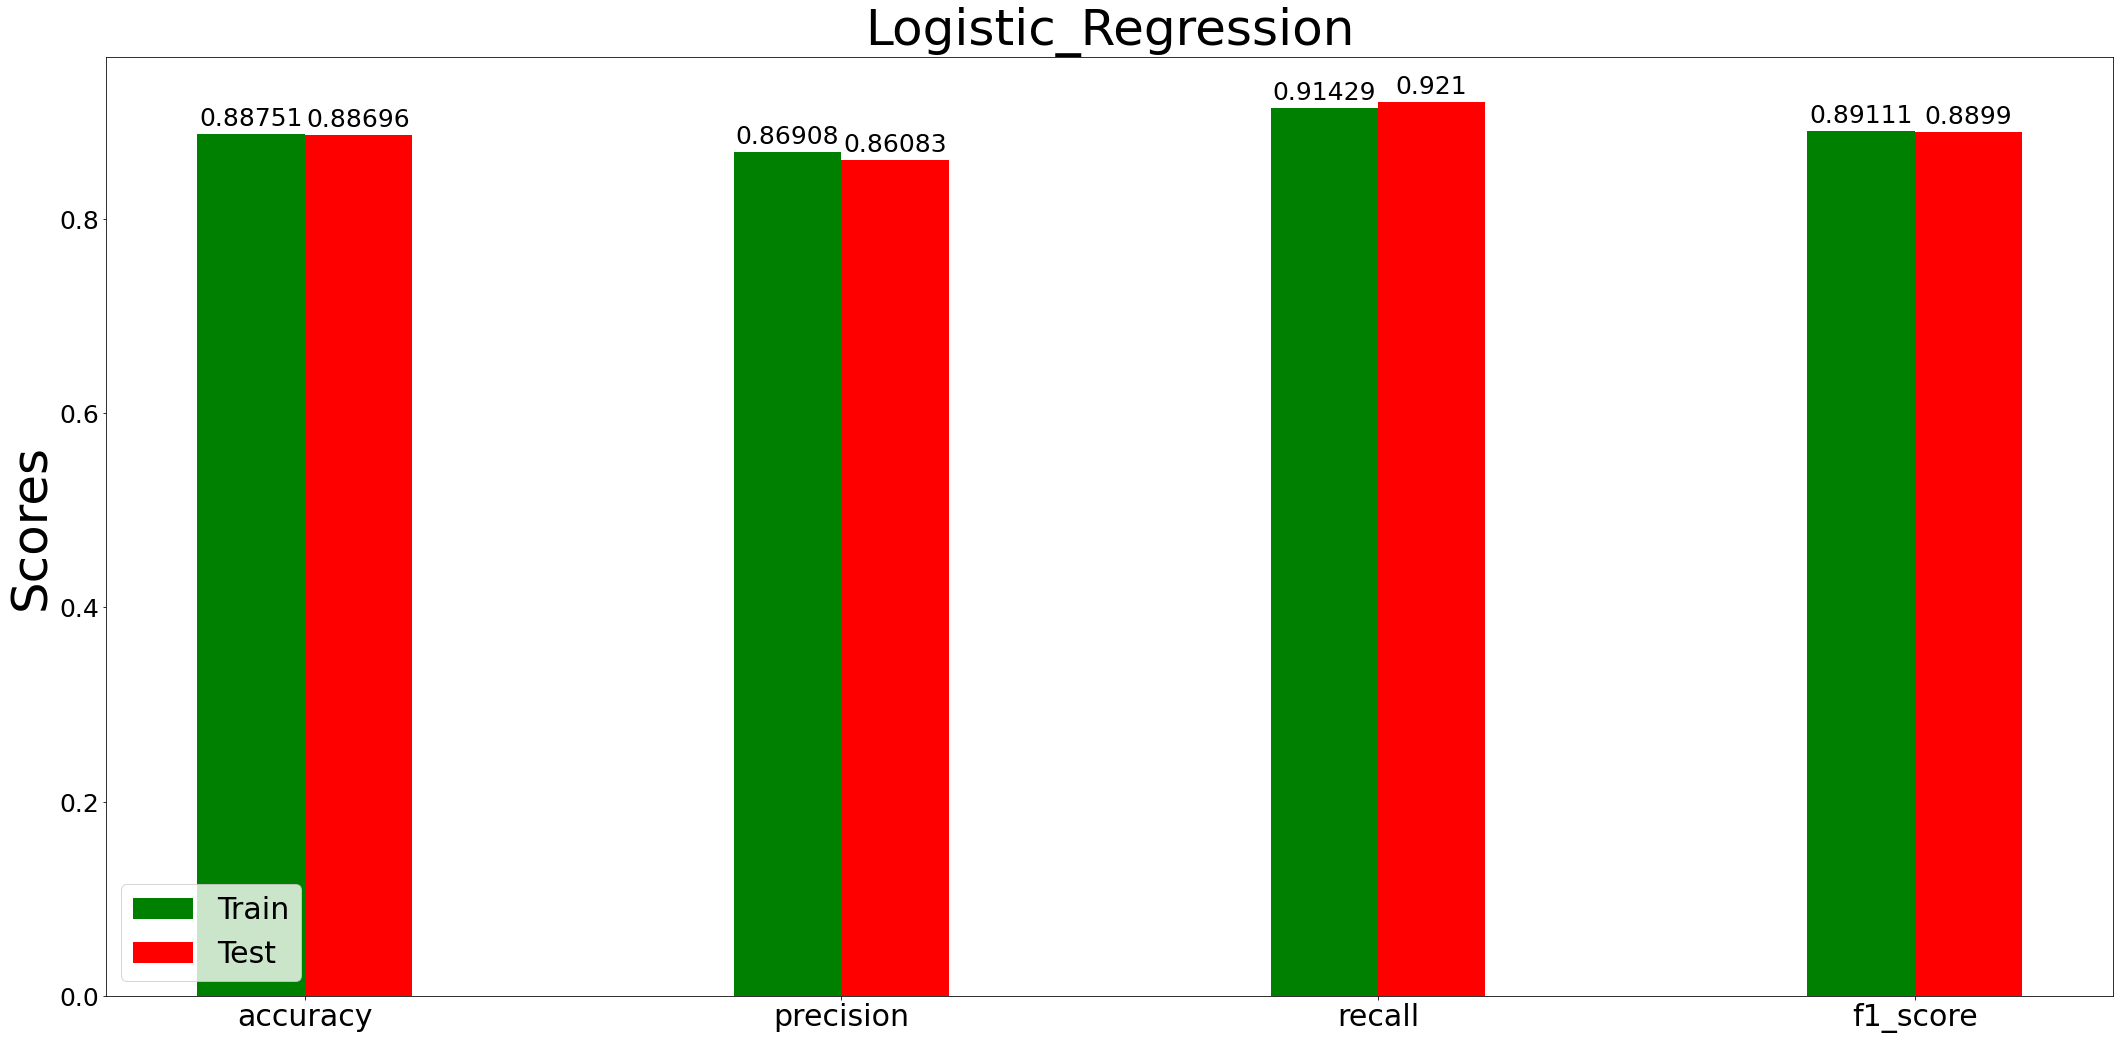

In [ ]:
LR_train = []
LR_test = []

#Train
LR_train.append(round(metrics.accuracy_score(y_train, ypred_train), 5))
LR_train.append(round(metrics.precision_score(y_train, ypred_train), 5))
LR_train.append(round(metrics.recall_score(y_train, ypred_train), 5))
LR_train.append(round(metrics.f1_score(y_train, ypred_train), 5))
#Test
LR_test.append(round(metrics.accuracy_score(y_test, ypred_test), 5))
LR_test.append(round(metrics.precision_score(y_test, ypred_test), 5))
LR_test.append(round(metrics.recall_score(y_test, ypred_test), 5))
LR_test.append(round(metrics.f1_score(y_test, ypred_test), 5))
# plot
plotplot(category,LR_train,LR_test,'Logistic_Regression','green','red')

# **GaussianNB**

In [ ]:
# GaussianNB 
gnb = GaussianNB()
gnb.fit(X_scale_train,y_train)

GaussianNB()

In [ ]:
ypred_train = gnb.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, ypred_train), 5))
evo_met(y_train, ypred_train,'GaussianNB train')


confusion matrix of GaussianNB train is:



,Predicted Negative,Predicted Positive
Actual Negative,10403,2774
Actual Positive,673,12686


In [ ]:
ypred_test = gnb.predict(X_scale_test)
train.append(round(metrics.accuracy_score(y_test, ypred_test), 5))
evo_met(y_test, ypred_test,'GaussianNB train')

confusion matrix of GaussianNB train is:



,Predicted Negative,Predicted Positive
Actual Negative,2613,731
Actual Positive,160,3131


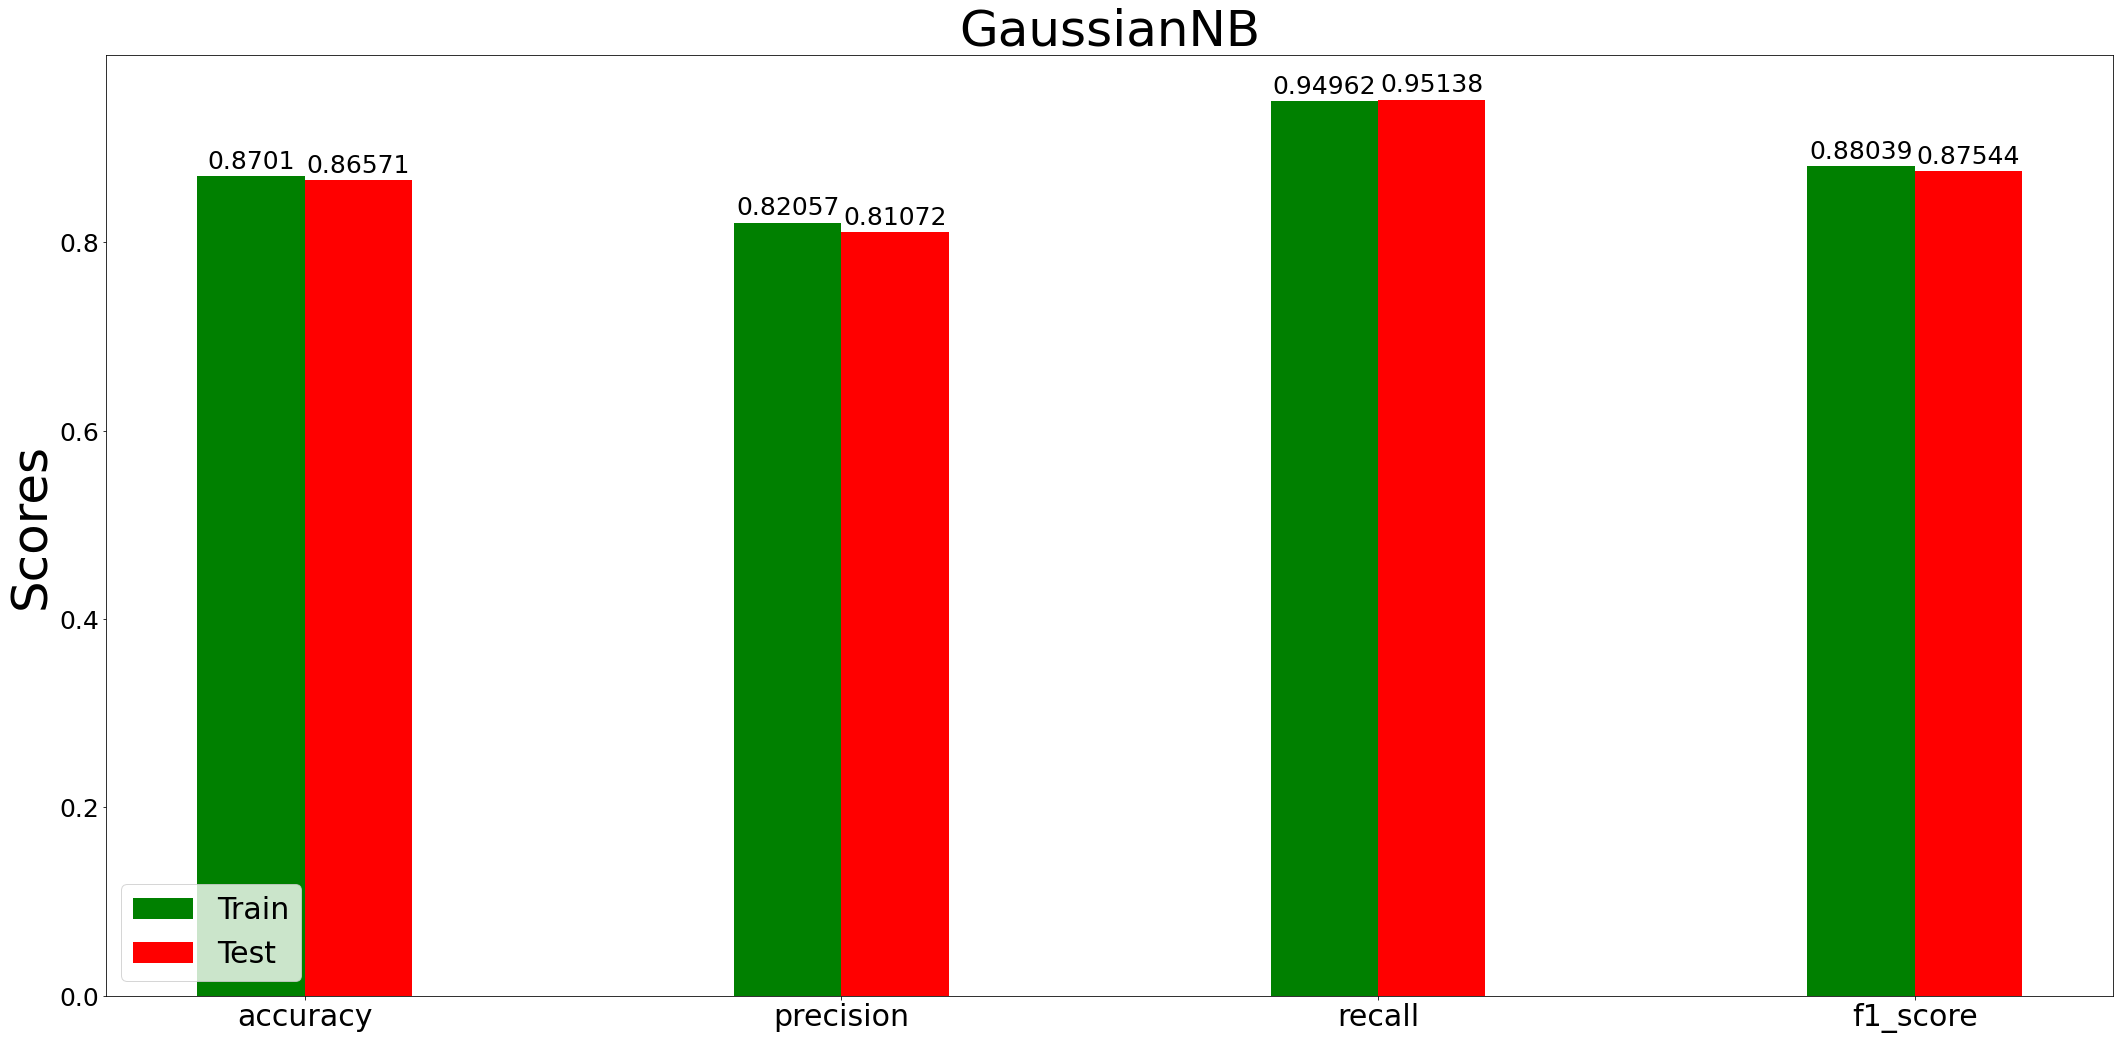

In [ ]:
gnb_train = []
gnb_test = []

#Train
gnb_train.append(round(metrics.accuracy_score(y_train, ypred_train), 5))
gnb_train.append(round(metrics.precision_score(y_train, ypred_train), 5))
gnb_train.append(round(metrics.recall_score(y_train, ypred_train), 5))
gnb_train.append(round(metrics.f1_score(y_train, ypred_train), 5))
#Test
gnb_test.append(round(metrics.accuracy_score(y_test, ypred_test), 5))
gnb_test.append(round(metrics.precision_score(y_test, ypred_test), 5))
gnb_test.append(round(metrics.recall_score(y_test, ypred_test), 5))
gnb_test.append(round(metrics.f1_score(y_test, ypred_test), 5))
# plot
plotplot(category,gnb_train,gnb_test,'GaussianNB','green','red')

# **Decision Tree**

In [ ]:
#DecisionTreeClassifier
best_max_depth, best_min_samples_split, best_f1_val = find_best_decision_tree_params(X_train,y_train)
decisionTree = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
decisionTree.fit(X_scale_train,y_train)


DecisionTreeClassifier(max_depth=4, min_samples_split=5)

In [ ]:
ypred_train = decisionTree.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, ypred_train), 5))
evo_met(y_train, ypred_train,'Decision Tree train')

confusion matrix of Decision Tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,11460,1717
Actual Positive,1182,12177


In [ ]:
ypred_test = decisionTree.predict(X_scale_test)
train.append(round(metrics.accuracy_score(y_test, ypred_test), 5))
evo_met(y_test, ypred_test,'Decision Tree train')

confusion matrix of Decision Tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,2881,463
Actual Positive,264,3027


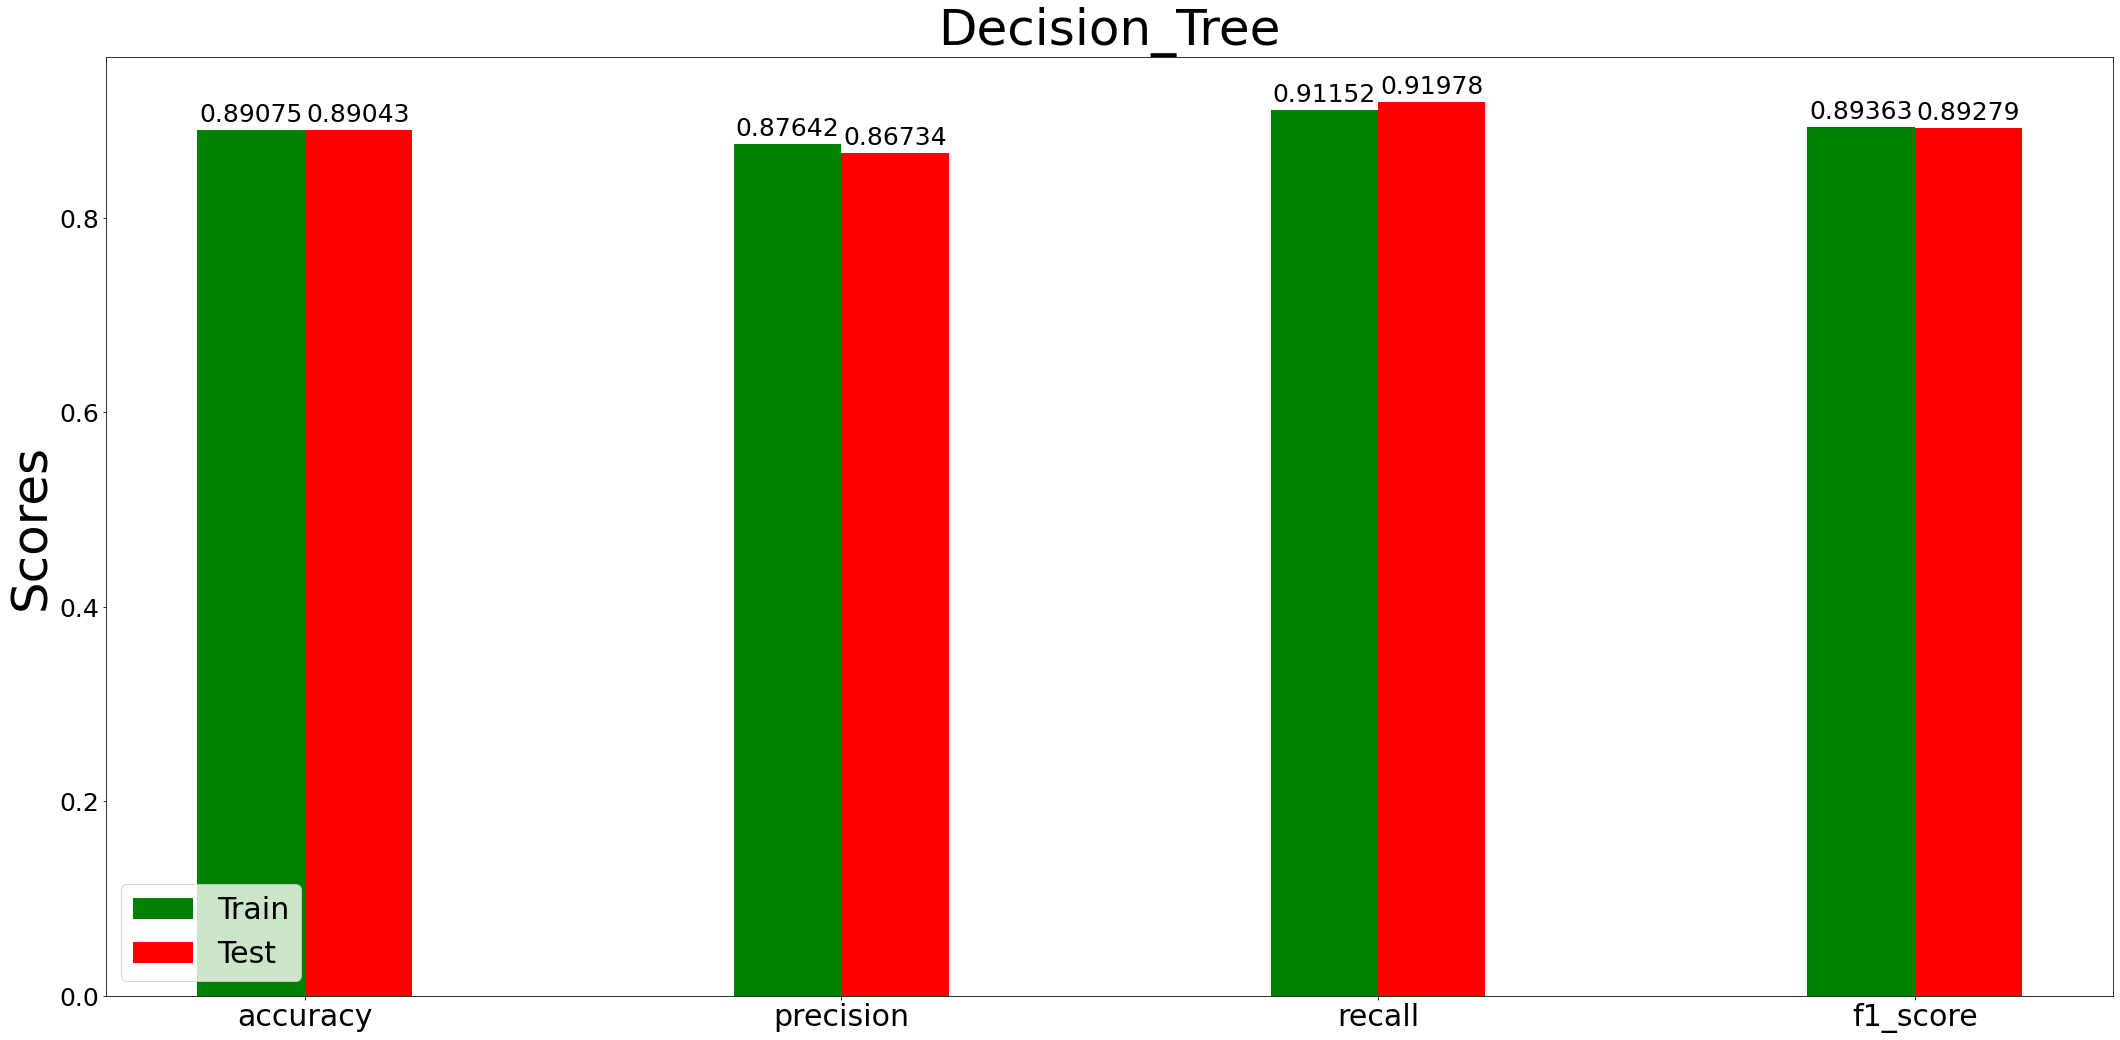

In [ ]:
dt_train = []
dt_test = []

#Train
dt_train.append(round(metrics.accuracy_score(y_train, ypred_train), 5))
dt_train.append(round(metrics.precision_score(y_train, ypred_train), 5))
dt_train.append(round(metrics.recall_score(y_train, ypred_train), 5))
dt_train.append(round(metrics.f1_score(y_train, ypred_train), 5))
#Test
dt_test.append(round(metrics.accuracy_score(y_test, ypred_test), 5))
dt_test.append(round(metrics.precision_score(y_test, ypred_test), 5))
dt_test.append(round(metrics.recall_score(y_test, ypred_test), 5))
dt_test.append(round(metrics.f1_score(y_test, ypred_test), 5))
# plot
plotplot(category,dt_train,dt_test,'Decision_Tree','green','red')

# **KNN**

In [ ]:
best_K, best_f1_KNN_params = find_best_k_for_KNN(X_scale_train, y_train)
knn = KNeighborsClassifier(n_neighbors=best_K)
knn.fit(X_scale_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
ypred_train = knn.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, ypred_train), 5))
evo_met(y_train, ypred_train,'KNN train')

confusion matrix of KNN train is:



,Predicted Negative,Predicted Positive
Actual Negative,11424,1753
Actual Positive,1112,12247


In [ ]:
ypred_test = knn.predict(X_scale_test)
train.append(round(metrics.accuracy_score(y_test, ypred_test), 5))
evo_met(y_test, ypred_test,'KNN train')

confusion matrix of KNN train is:



,Predicted Negative,Predicted Positive
Actual Negative,2778,566
Actual Positive,334,2957


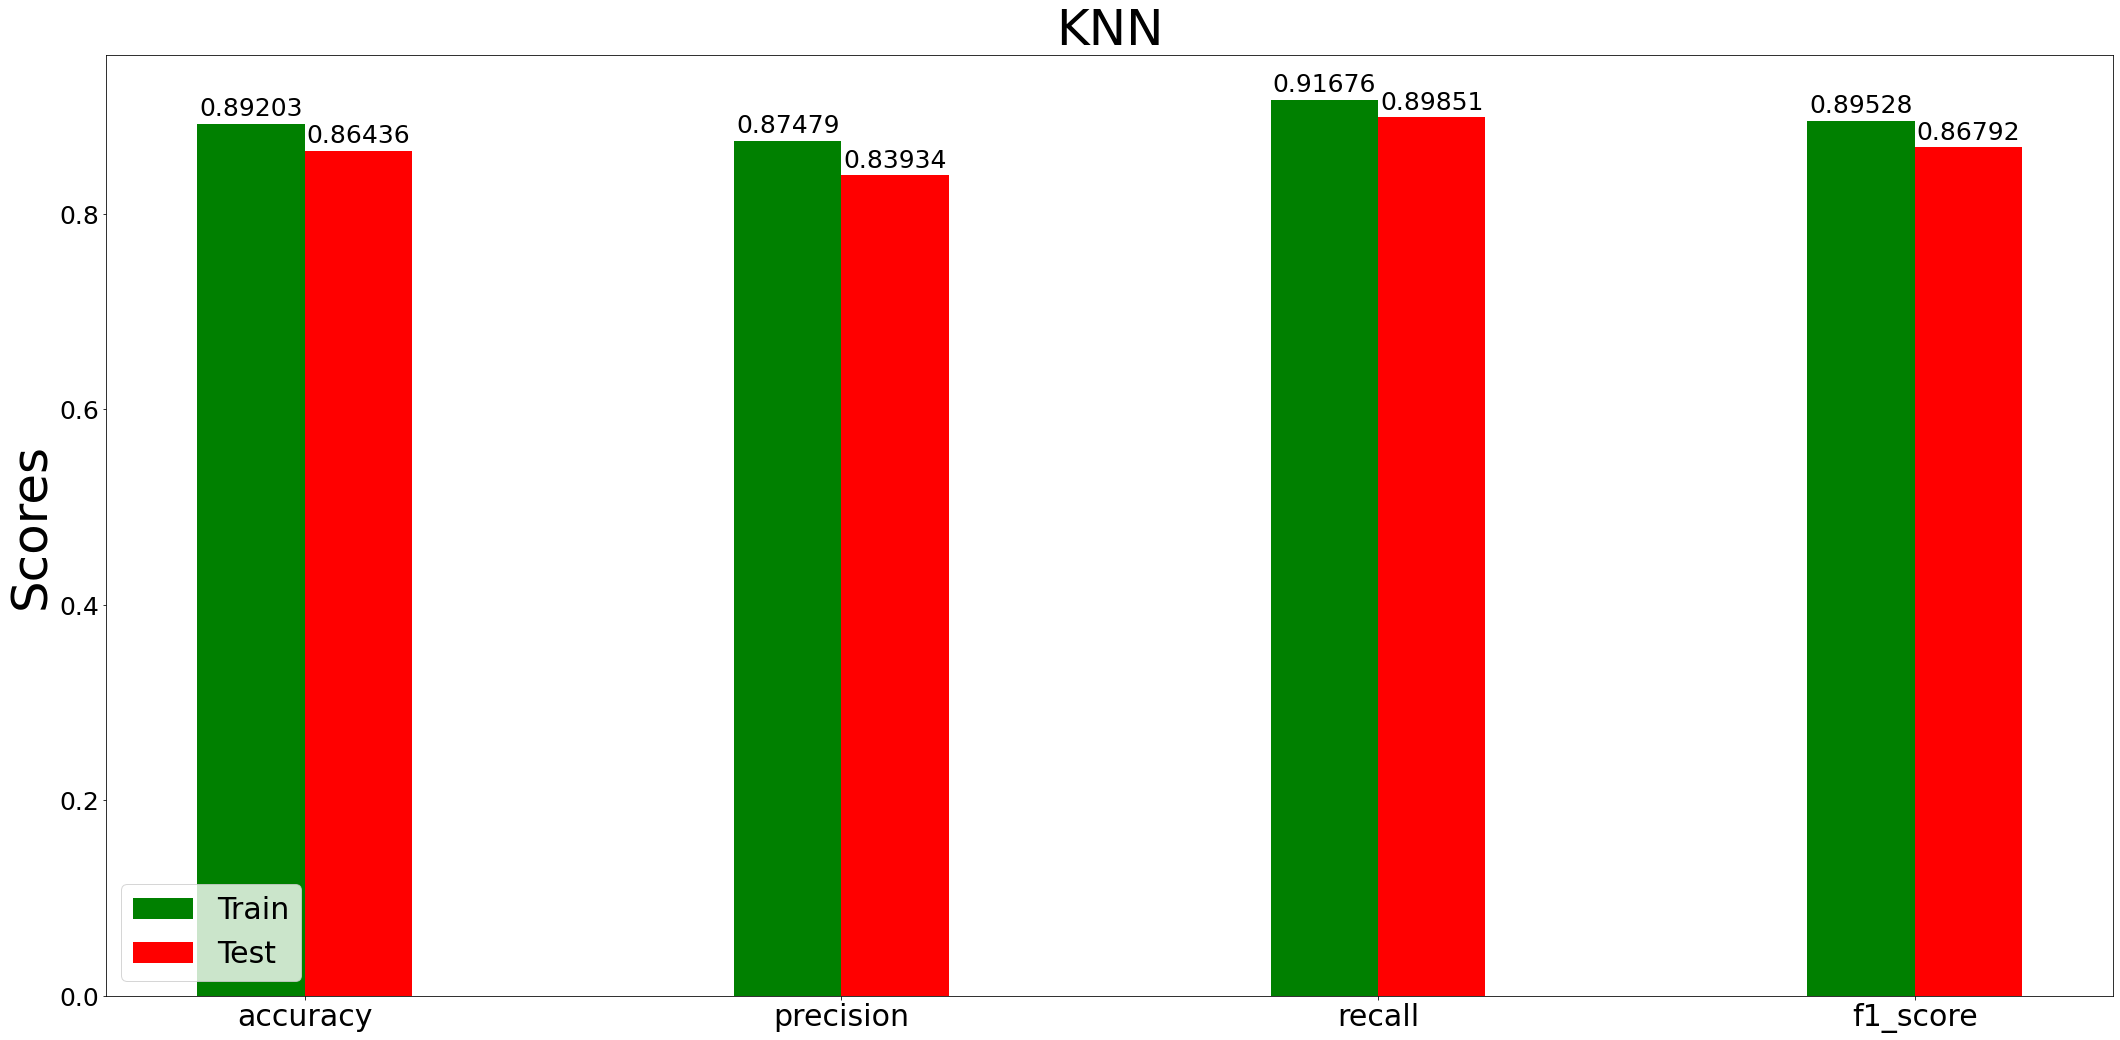

In [ ]:
knn_train = []
knn_test = []

#Train
knn_train.append(round(metrics.accuracy_score(y_train, ypred_train), 5))
knn_train.append(round(metrics.precision_score(y_train, ypred_train), 5))
knn_train.append(round(metrics.recall_score(y_train, ypred_train), 5))
knn_train.append(round(metrics.f1_score(y_train, ypred_train), 5))
#Test
knn_test.append(round(metrics.accuracy_score(y_test, ypred_test), 5))
knn_test.append(round(metrics.precision_score(y_test, ypred_test), 5))
knn_test.append(round(metrics.recall_score(y_test, ypred_test), 5))
knn_test.append(round(metrics.f1_score(y_test, ypred_test), 5))
# plot
plotplot(category,knn_train,knn_test,'KNN','green','red')

# **RandomForest**

In [ ]:
best_num_estimators, best_f1_val = find_best_random_forest_num_estimators(X_scale_train, y_train)
rfc = RandomForestClassifier(n_estimators = best_num_estimators, max_depth=7)
rfc.fit(X_scale_train,y_train)


RandomForestClassifier(max_depth=7, n_estimators=71)

In [ ]:
ypred_train = rfc.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, ypred_train), 5))
evo_met(y_train, ypred_train,'Random Forest train')

confusion matrix of Random Forest train is:



,Predicted Negative,Predicted Positive
Actual Negative,11462,1715
Actual Positive,1150,12209


In [ ]:
ypred_test = rfc.predict(X_scale_test)
train.append(round(metrics.accuracy_score(y_test, ypred_test), 5))
evo_met(y_test, ypred_test,'Random Forest train')

confusion matrix of Random Forest train is:



,Predicted Negative,Predicted Positive
Actual Negative,2878,466
Actual Positive,267,3024


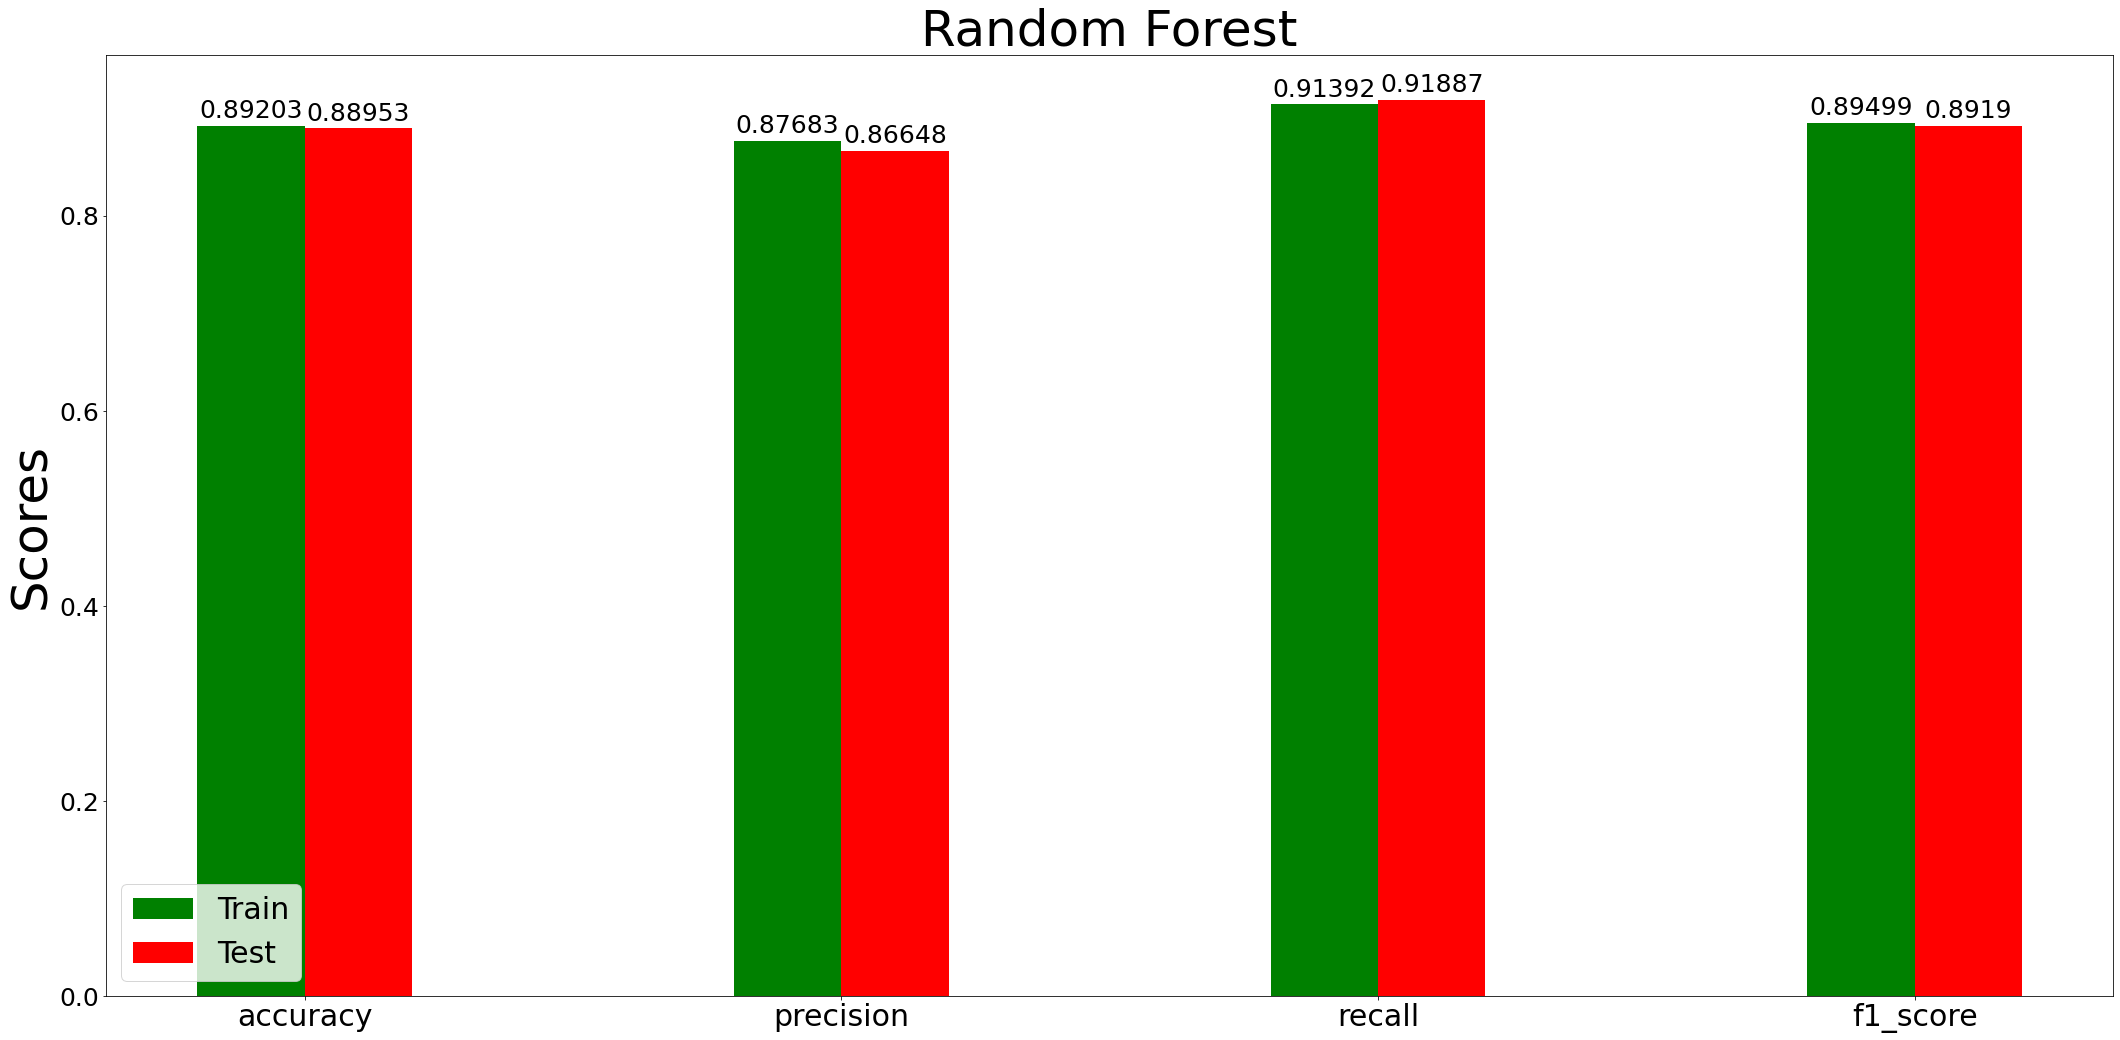

In [ ]:
rfc_train = []
rfc_test = []

#Train
rfc_train.append(round(metrics.accuracy_score(y_train, ypred_train), 5))
rfc_train.append(round(metrics.precision_score(y_train, ypred_train), 5))
rfc_train.append(round(metrics.recall_score(y_train, ypred_train), 5))
rfc_train.append(round(metrics.f1_score(y_train, ypred_train), 5))
#Test
rfc_test.append(round(metrics.accuracy_score(y_test, ypred_test), 5))
rfc_test.append(round(metrics.precision_score(y_test, ypred_test), 5))
rfc_test.append(round(metrics.recall_score(y_test, ypred_test), 5))
rfc_test.append(round(metrics.f1_score(y_test, ypred_test), 5))
# plot
plotplot(category,rfc_train,rfc_test,'Random Forest','green','red')

# **SVM**

In [ ]:
svm = SVC(gamma=0.01,kernel="rbf")
svm.fit(X_scale_train,y_train)

SVC(gamma=0.01)

In [ ]:
ypred_train = svm.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, ypred_train), 5))
evo_met(y_train, ypred_train,'SVM train')

confusion matrix of SVM train is:



,Predicted Negative,Predicted Positive
Actual Negative,11303,1874
Actual Positive,1098,12261


In [ ]:
ypred_test = svm.predict(X_scale_test)
train.append(round(metrics.accuracy_score(y_test, ypred_test), 5))
evo_met(y_test, ypred_test,'SVM train')

confusion matrix of SVM train is:



,Predicted Negative,Predicted Positive
Actual Negative,2841,503
Actual Positive,259,3032


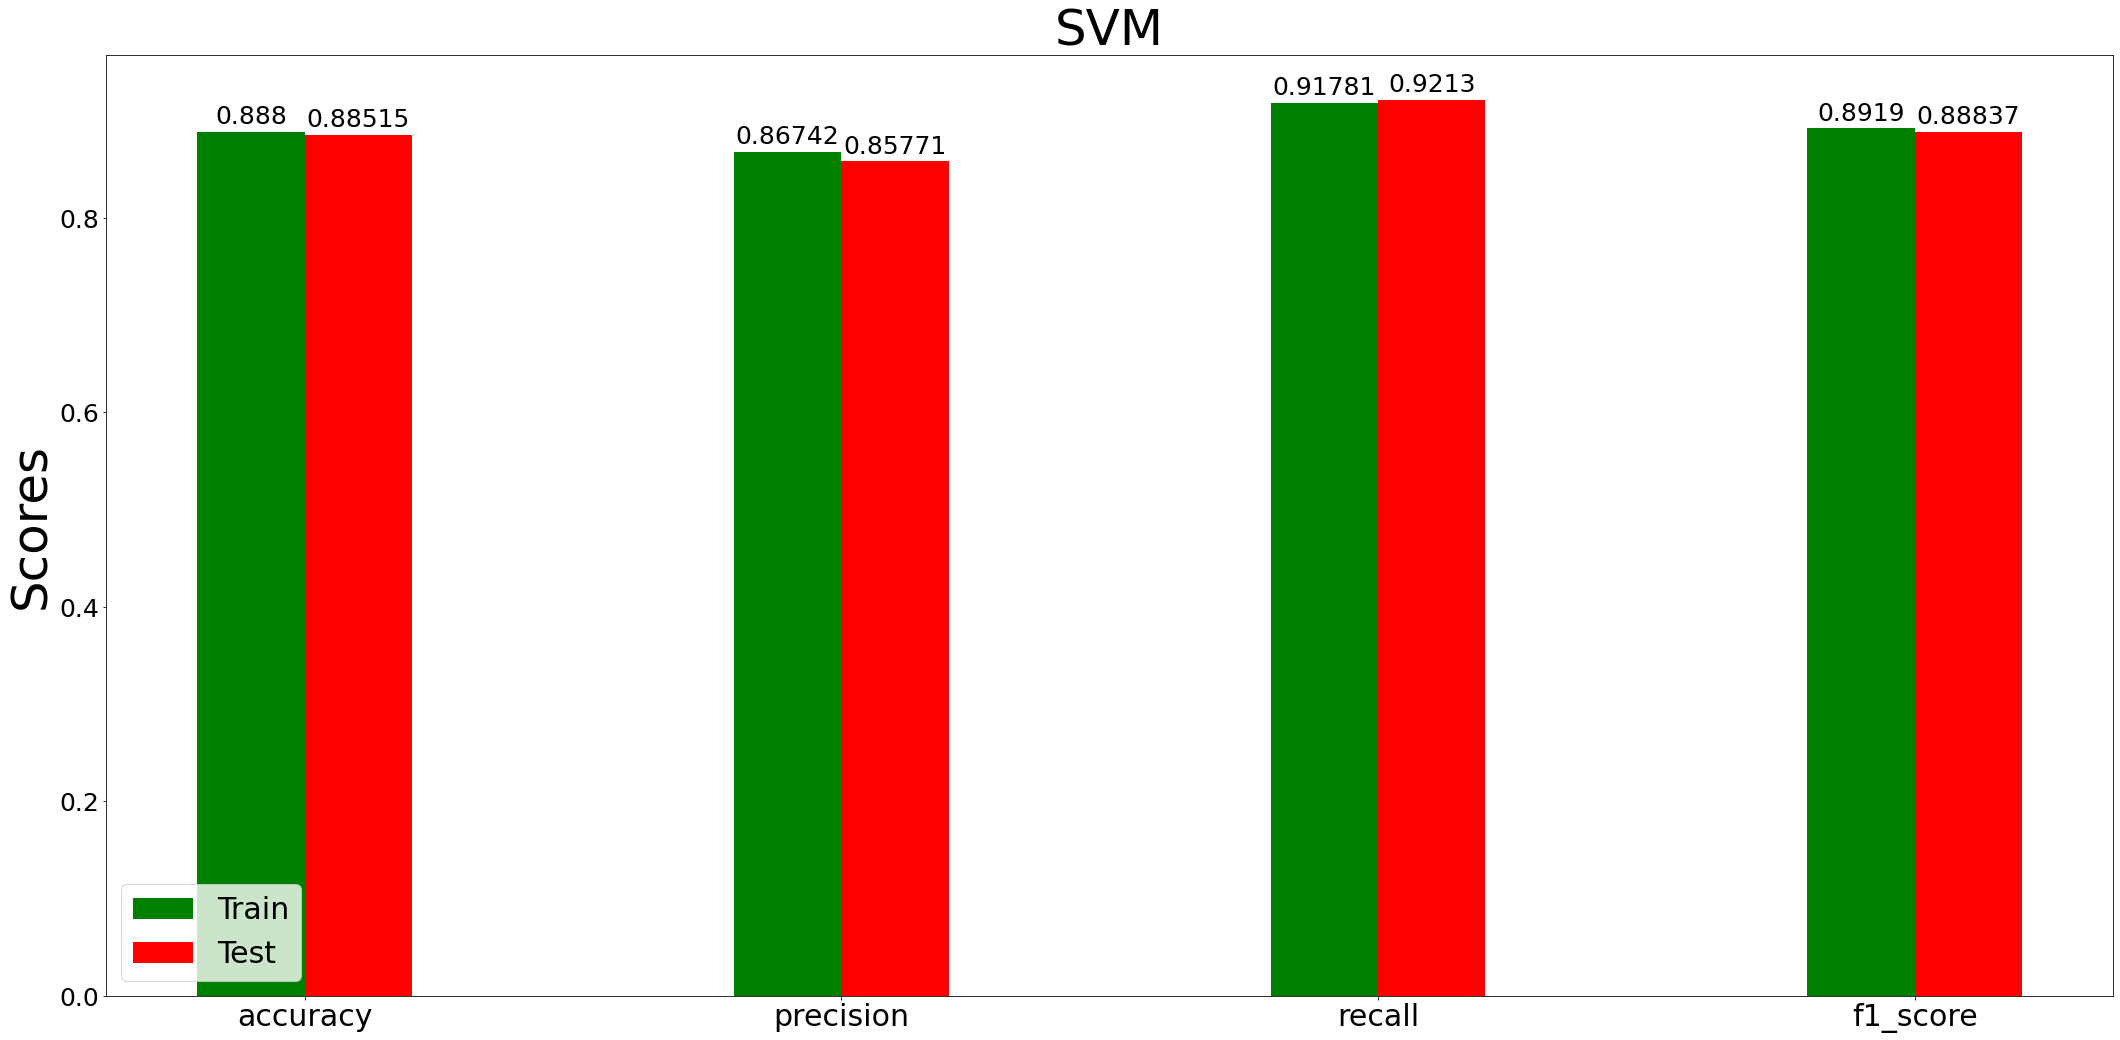

In [ ]:
svm_train = []
svm_test = []

#Train
svm_train.append(round(metrics.accuracy_score(y_train, ypred_train), 5))
svm_train.append(round(metrics.precision_score(y_train, ypred_train), 5))
svm_train.append(round(metrics.recall_score(y_train, ypred_train), 5))
svm_train.append(round(metrics.f1_score(y_train, ypred_train), 5))
#Test
svm_test.append(round(metrics.accuracy_score(y_test, ypred_test), 5))
svm_test.append(round(metrics.precision_score(y_test, ypred_test), 5))
svm_test.append(round(metrics.recall_score(y_test, ypred_test), 5))
svm_test.append(round(metrics.f1_score(y_test, ypred_test), 5))
# plot
plotplot(category,svm_train,svm_test,'SVM','green','red')

**We made predictions about early departure from work for an employee in the Israeli economy, we worked with all kinds of prediction methods, the best result was given by KNN.**